In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set()

# Importing the data and pre-screening

In [2]:
# import csv file
df = pd.read_csv('owid-covid-data.csv')

In [3]:
# check the shape of the dataframe
df.shape

(355597, 67)

In [4]:
# check the data types of the columns
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [5]:
# check the number of unique values in each column
df.nunique(axis=0)

iso_code                                      255
continent                                       6
location                                      255
date                                         1416
total_cases                                136080
                                            ...  
population                                    255
excess_mortality_cumulative_absolute        12012
excess_mortality_cumulative                  4141
excess_mortality                             5301
excess_mortality_cumulative_per_million     12153
Length: 67, dtype: int64

In [6]:
# check the basic statistics of the dataframe
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.174560e+05,3.458550e+05,3.445960e+05,2.957370e+05,345907.00000,344677.000000,317456.000000,345855.000000,344596.000000,295737.000000,...,204106.000000,135093.000000,243502.000000,327161.000000,267323.000000,3.555970e+05,1.221100e+04,12211.000000,12211.000000,12211.000000
mean,6.796974e+06,9.457200e+03,9.491605e+03,8.666838e+04,84.23524,84.532007,103457.466834,143.042496,143.560684,879.848094,...,32.909095,50.790493,3.097308,73.712414,0.722458,1.286064e+08,5.312168e+04,9.760347,11.337701,1675.398350
std,4.123893e+07,1.094194e+05,9.374232e+04,4.426444e+05,608.98649,554.835927,152731.556394,1154.807442,595.505275,1105.379761,...,13.573541,31.955189,2.548266,7.394684,0.148968,6.612334e+08,1.494480e+05,12.293895,25.166908,1941.471481
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,8.285000e+03,0.000000e+00,2.860000e-01,1.280000e+02,0.00000,0.000000,2646.234750,0.000000,0.030000,61.388000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.216500e+02,1.430000,-1.590000,73.764453
50%,7.143600e+04,1.000000e+00,2.357100e+01,1.341000e+03,0.00000,0.143000,29017.293000,0.088000,6.143000,384.979000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.968999e+03,8.100000,5.720000,1115.956200
75%,7.667340e+05,2.510000e+02,4.821430e+02,1.198800e+04,3.00000,4.857000,136995.770250,33.849000,79.974000,1374.303000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.770731e+04,15.380000,16.300000,2746.703700
max,7.718202e+08,8.401960e+06,6.402036e+06,6.978162e+06,27939.00000,14821.857000,737554.506000,228872.025000,37241.781000,6511.885000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.620000,377.630000,10292.916000


### From the statistics (and the documentation) it is clear that the analysed columns should be in the same unit (e.g. per million people)

In [7]:
# check the number of null values in each column
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
print(missing_data[missing_data["total"]>0][:45])

                                             total   percent
weekly_icu_admissions                       345321  0.971102
weekly_icu_admissions_per_million           345321  0.971102
excess_mortality_cumulative_per_million     343386  0.965661
excess_mortality                            343386  0.965661
excess_mortality_cumulative                 343386  0.965661
excess_mortality_cumulative_absolute        343386  0.965661
weekly_hosp_admissions                      332169  0.934116
weekly_hosp_admissions_per_million          332169  0.934116
icu_patients_per_million                    317825  0.893779
icu_patients                                317825  0.893779
hosp_patients_per_million                   316457  0.889932
hosp_patients                               316457  0.889932
total_boosters                              307518  0.864794
total_boosters_per_hundred                  307518  0.864794
new_vaccinations                            289752  0.814833
people_fully_vaccinated 

### From here we can see that excess mortality, hospital/icu admissions/patients, boosters, vaccinations, tests have a lot of null values these columns are then not useful for the analysis

In [8]:
# observe the first 5 rows of the dataframe
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [9]:
# turn date into datetime format
df['date'] = pd.to_datetime(df['date'])

# Visualisation 1. Total cases per continent through the time.
The aim of this visualisation was to show the dynamic development of the total number of cases for each continent. I chose to show this with a line plot, because, upon taking an average for all countries of a continent, the variance becomes rather large. In order to illustrate this for the viewer, I use the line plot.

The thought behind showing the viewer the cumulative number of cases gives a simple overview of the dynamic of COVID-19 development as a pandemic on the different continents on the planet. 

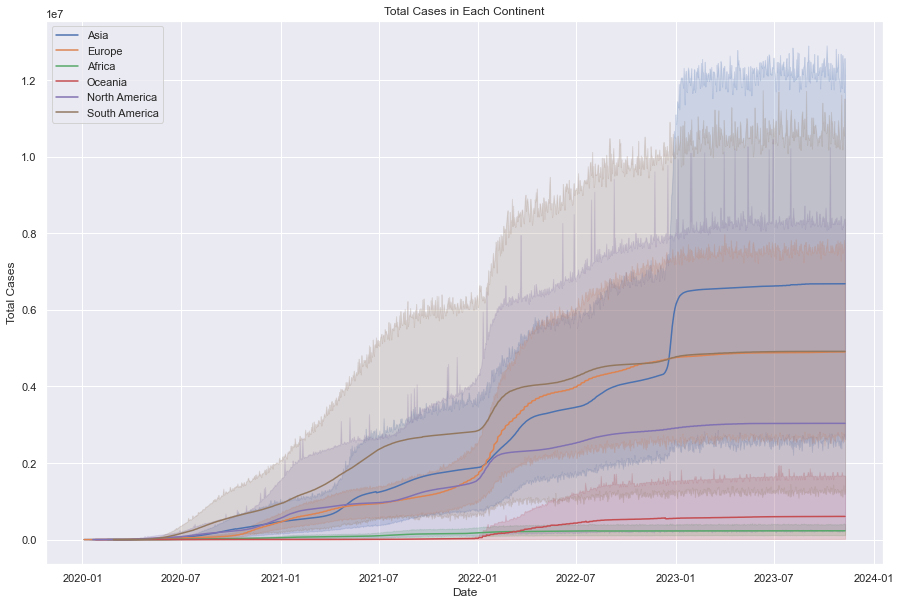

In [10]:
plt.figure(figsize=(15,10))
# create a line through the scatter plot for every continent
sns.lineplot(x='date',y='total_cases',data=df,hue='continent')
plt.title('Total Cases in Each Continent')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(loc='upper left')
plt.show()



# Visualisation 2. Heatmap of COVID-19 Cases on a world map.
Using Geopandas, I intend to show the world map as a heatmap, which illustrates how different countries suffered from more cases than others. The goal is to highlight whether neighboring countries have a tendency to display similar rates of cases.

The color of the map ranges from beige to red, allowing for a higher cases number to be associated with a more dangerous color, meanwhile beige remains neutral. The missing parts on the map did not have data provided for the total number of cases and are thus not included.

Also, due to the fact that Geopandas dataset and the COVID dataset have quite a number of countries that are named differently in their documentation, prior cleaning has to be done in order to include as many countries as possible in the visualisation.

In [11]:
#print all the countries in the dataframe
print(df['location'].unique())

# get all the countries in the naturalearth data a-z sorted
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.sort_values(by=['name'])

print(world['name'].unique())

print(len(world['name'].unique()))
print(len(df['location'].unique()))

# print out all the names that are mismatched between the two dataframes, also find best match by first three letters
for i in df['location'].unique():
    if i not in world['name'].unique():
        # find the best match by first three letters
        best_match = world[world['name'].str.startswith(i[:4])]['name'].unique()
        if len(best_match) == 0:
            # look for dot character in i
            if '.' in i:
                print(i)
            else:
                # drop the row if no best match is found
                df = df[df['location'] != i]
        else:
            print(i)
            print(best_match)
            

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' '

<ipython-input-11-2cd1ef1b5f89>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antarctica' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bangladesh'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herz.' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Rep.' 'Chad'
 'Chile' 'China' 'Colombia' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Côte d'Ivoire" 'Dem. Rep. Congo' 'Denmark' 'Djibouti'
 'Dominican Rep.' 'Ecuador' 'Egypt' 'El Salvador' 'Eq. Guinea' 'Eritrea'
 'Estonia' 'Ethiopia' 'Falkland Is.' 'Fiji' 'Finland'
 'Fr. S. Antarctic Lands' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lith

In [63]:
# remove Dominica, Mauritius, Montserrat, North America, Northern Cyprus, Northern Ireland, Northern Mariana Islands, South America, South Sudan, Timor, Turks and Caicos Islands, United States Virgin Islands
df = df[df['location'] != 'Dominica']
df = df[df['location'] != 'Mauritius']
df = df[df['location'] != 'Montserrat']
df = df[df['location'] != 'North America']
df = df[df['location'] != 'Northern Cyprus']
df = df[df['location'] != 'Northern Ireland']
df = df[df['location'] != 'Northern Mariana Islands']
df = df[df['location'] != 'South America']
df = df[df['location'] != 'South Sudan']
df = df[df['location'] != 'Timor']
df = df[df['location'] != 'Turks and Caicos Islands']
df = df[df['location'] != 'United States Virgin Islands']

# rename the countries in the naturalearth data to match the dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#united states
world['name'] = world['name'].replace('United States of America','United States')
# bosnia
world['name'] = world['name'].replace('Bosnia and Herz.','Bosnia and Herzegovina')
# dominican republic
world['name'] = world['name'].replace('Dominican Rep.','Dominican Republic')
# central african republic
world['name'] = world['name'].replace('Central African Rep.','Central African Republic')
# falkland islands
world['name'] = world['name'].replace('Falkland Is.','Falkland Islands')
# solomon islands
world['name'] = world['name'].replace('Solomon Is.','Solomon Islands')
# western sahara
world['name'] = world['name'].replace('W. Sahara','Western Sahara')
# northern cyprus
world['name'] = world['name'].replace('N. Cyprus','Northern Cyprus')

# check that all the countries are matched
print(len(world['name'].unique()))
print(len(df['location'].unique()))


177
166


<ipython-input-63-a6df3977302f>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


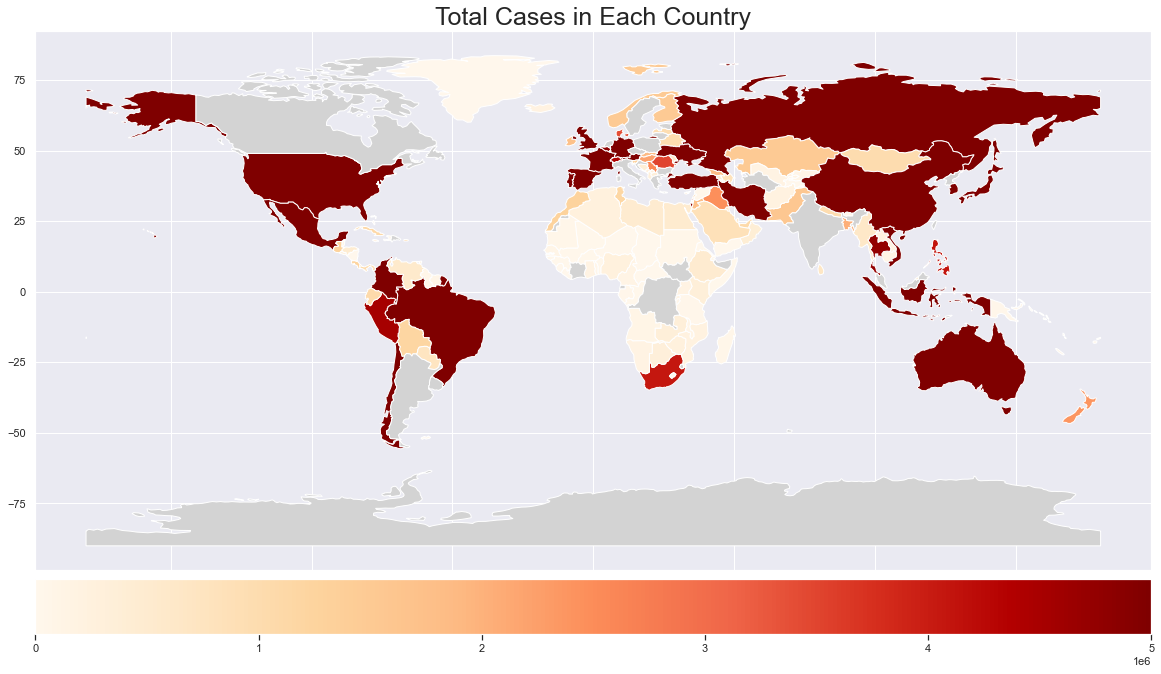

In [71]:
# get the row with the latest date for every country
df_latest = df.loc[df.groupby('location').date.idxmax()]

# get the rest of the world to plot it in grey
world_rest = world.merge(df_latest, left_on='name', right_on='location', indicator=True, how='outer')
world_rest = world_rest[world_rest['_merge'] == 'left_only']

# left join the two dataframes on the country name
world_viz = world.merge(df_latest, left_on='name', right_on='location')
world_viz = pd.concat([world_viz, world_rest])

# plot the map
world_viz.plot(column='total_cases', cmap='OrRd', figsize=(20, 15), legend=True, legend_kwds={"orientation": "horizontal", "pad": 0.01}, norm=plt.Normalize(vmin=0, vmax=5000000), missing_kwds= dict(color = "lightgrey"))
plt.title('Total Cases in Each Country', fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.show()


# Visualisation 3. Investigation of correlated variables in the dataset.
In order to get a perspective on whether there are correlated variables present in the dataset, I will first plot a pair-grid from seaborn.
From the initial data screening process, I decided to focus on cumulative values for a variety of variables (total_x_per_million) that mostly contained non-NaN values. On top of that, some meaningful statistical values were taken, such as GDP per capita and population density. 

After obtaining a pair grid, it became evident that there was a power law correlation between 'total cases per million' and 'GDP per capita'. The nature of this correlation is further discussed and visualised in the following section.  

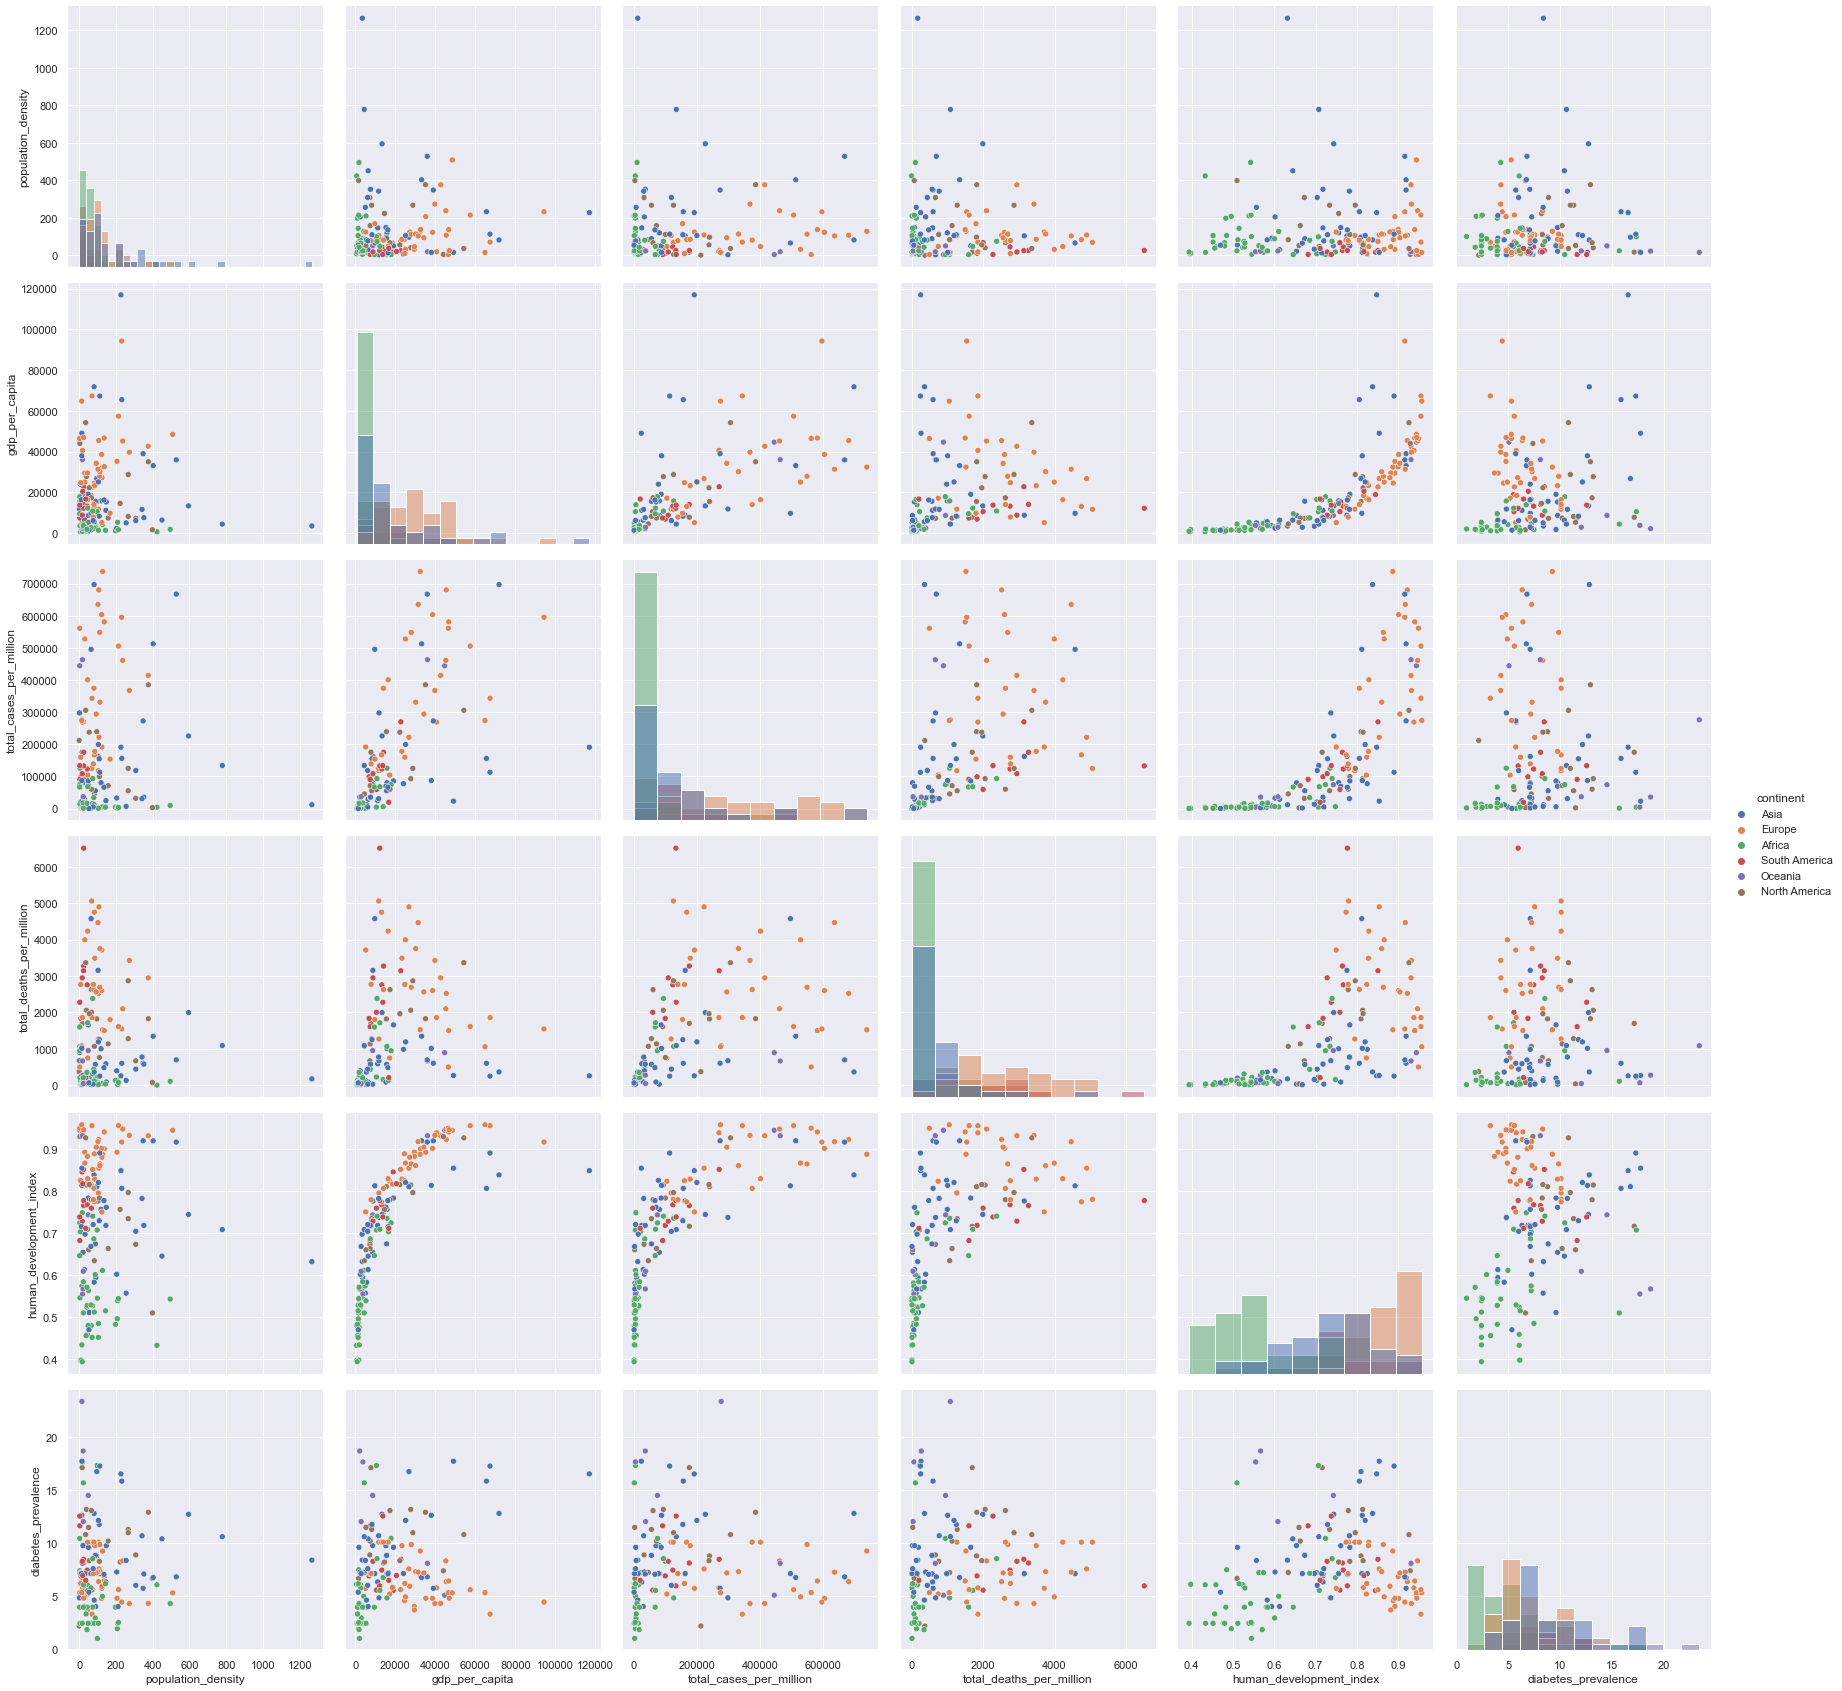

In [14]:
# extract total_cases_per_million, total_deaths_per_million, icu_patients_per_million, hosp_patients_per_million, total_tests_per_thousand, total_vaccinations_per_hundred, human_development_index, diabetes_prevalence, excess_mortality_cumulative_per_million
df2 = df_latest[['continent', 
                'population_density', 
                'gdp_per_capita', 
                'total_cases_per_million',
                'total_deaths_per_million',
                'human_development_index',
                'diabetes_prevalence']] 

g = sns.PairGrid(df2, hue='continent', height=4)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

# Visualisation 4. Plotting a best-fit regression line for two correlated variables.
In order to visualise the relationship between 'total_cases_per_million' and 'GDP_per_capita', which were expected to have a power law correlation upon investigating the pair grid from the previous section, I create a scatter plot for the log of the two variables. 

The obtained scatter plot seems to hint at some correlated nature, so NumPy's polyfit (n=1) is used to calculate and plot the best fit line for this correlation. The equation, along with the R2 value are displayed in the legend.

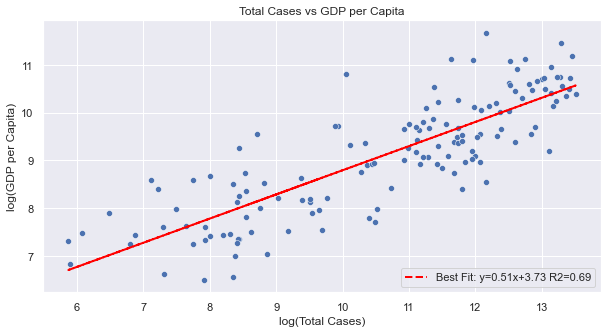

In [15]:
plt.figure(figsize=(10,5))

# plot the scatter plot with x as log of total cases and y as log of gdp per capita
sns.scatterplot(x=np.log(df_latest['total_cases_per_million']),y=np.log(df_latest['gdp_per_capita']))

# drop nan in total cases and gdp per capita
df_latest = df_latest.dropna(subset=['total_cases_per_million','gdp_per_capita'])

# get regression coefficients
m, b = np.polyfit(np.log(df_latest['total_cases_per_million']), np.log(df_latest['gdp_per_capita']), 1)

# plot the line of best fit
plt.plot(np.log(df_latest['total_cases_per_million']), m*np.log(df_latest['total_cases_per_million']) + b, label='Line of Best Fit', color='red', linewidth=2, linestyle='--')

# get r2 score
r2 = np.corrcoef(np.log(df_latest['total_cases_per_million']),np.log(df_latest['gdp_per_capita']))[0,1]**2

# add r2 score to legend of best fit line
plt.legend(['Best Fit: y={:.2f}x+{:.2f} R2={:.2f}'.format(m,b,r2)], loc='lower right')


plt.title('Total Cases vs GDP per Capita')
plt.xlabel('log(Total Cases)')
plt.ylabel('log(GDP per Capita)')
plt.show()


# Visualisation 5. Bar plot the new daily vaccinations in France and new daily deaths on a plot with two y-axes.
The point of this is to visualise the dynamic trend of these two variables, to examine whether a high number of deaths is followed by a high number of vaccinations (vaccination campaign initiation), also to see what the lag is after a vaccination campaign to reduce the number of deaths. 

Interestingly, towards the end of the dataset (starting 2022-07) there is a new deaths peak right after a vaccination peak. It is unclear why this happens and would require further investigation.

I had to set the width of the bars to 2, because this was the minimal width at which the bar colors showed up inside the notebook. It is possible to get greater resolution by saving the plot figure, so you can do that if you like.

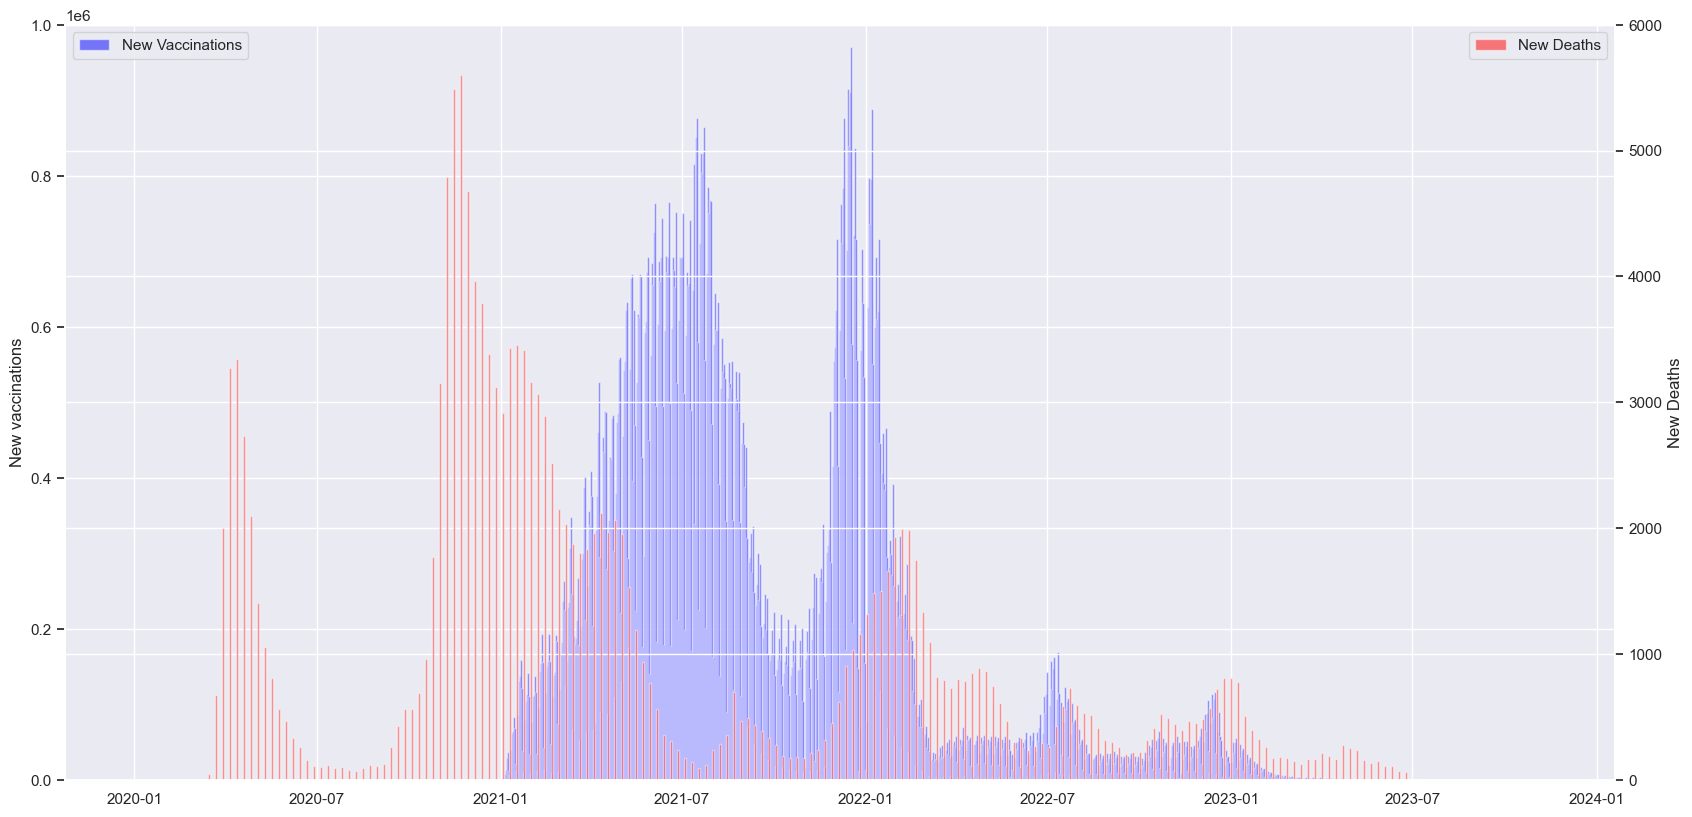

In [16]:
plt.figure(figsize=(20,10), dpi=100)

# plot the bar plot with x as date and y as new vaccinations
plt.bar(df[df['location']=='France']['date'],df[df['location']=='France']['new_vaccinations'], color='blue', alpha=0.5, label='New Vaccinations', width=2)
plt.ylabel('New vaccinations')
plt.ylim(0,1e6)
plt.legend(loc='upper left')

# initiate a second axis
plt.twinx()

# plot the bar plot with x as date and y as new_deaths with plt on a second axis
plt.bar(df[df['location']=='France']['date'],df[df['location']=='France']['new_deaths'], color='red', alpha=0.5, label='New Deaths', width=2)
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.ylim(0,6e3)
plt.legend(loc='upper right')

plt.show()